In [1]:
from netCDF4 import Dataset, Variable
import matplotlib.path as mpath
import cartopy
import xarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import os
import nctoolkit as nct
import regex
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib.patches as mpatches
from cartopy.util import add_cyclic_point
from matplotlib import colors
import geopandas as gpd
import shapely.geometry as shp
import shapely.ops as ops
import rioxarray
import pyproj
import pandas as pd
from matplotlib.offsetbox import AnchoredText
import matplotlib.colors as colors
import xskillscore as xs
from scipy.stats import kendalltau

nctoolkit is using Climate Data Operators version 1.9.8


In [2]:
nct.deep_clean()

In [3]:
os.chdir('/media/jasmine/Album/Project/')
print(os.getcwd())

/media/jasmine/Album/Project


In [4]:
variable = "rsntds"
print(variable)
model = "MPI-ESM1-2-HR"
print(model)
experiment = "ssp585"
print(experiment)
freq = "Omon"
print(freq)
name = "PAR"

rsntds
MPI-ESM1-2-HR
ssp585
Omon


In [5]:
nc = Dataset("Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_201501-210012.nc")
unit = getattr(nc.variables[variable], "units")
unit

'W m-2'

## Merging files by time


In [18]:
new = []
historical = []

In [19]:
for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_{}".format(variable, freq, model, experiment)):
        print(file)
        new.append("Data/Raw/{}".format(file))

print("\n")

for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_historical".format(variable, freq, model)):
        print(file)
        historical.append("Data/Raw/{}".format(file))

rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_202001-202412.nc
rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_202501-202912.nc
rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_203001-203412.nc
rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_203501-203912.nc
rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_204001-204412.nc
rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_204501-204912.nc
rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_205001-205412.nc
rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_205501-205912.nc
rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_206001-206412.nc
rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_206501-206912.nc
rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_207001-207412.nc
rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_207501-207912.nc
rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_208001-208412.nc
rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_208501-208912.nc
rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_209001-209412.nc
rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_209501-209912.nc
rsntds_O

In [20]:
new = ' '.join(new)
new

'Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_202001-202412.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_202501-202912.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_203001-203412.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_203501-203912.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_204001-204412.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_204501-204912.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_205001-205412.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_205501-205912.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_206001-206412.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_206501-206912.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_207001-207412.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_207501-207912.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_208001-208412.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_208501-208912.nc Data/

In [21]:
os.putenv("new", ' '.join(new))

In [22]:
!echo $new

Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_202001-202412.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_202501-202912.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_203001-203412.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_203501-203912.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_204001-204412.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_204501-204912.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_205001-205412.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_205501-205912.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_206001-206412.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_206501-206912.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_207001-207412.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_207501-207912.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_208001-208412.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_208501-208912.nc Data/R

In [23]:
!cdo mergetime $new Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_201501-210012.nc

cdo    mergetime: Processed 18 variables over 1032 timesteps [60.38s 635MB].


In [9]:
historical_all = historical[-10:-6]
historical_all

['Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_199501-199912.nc',
 'Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_200001-200412.nc',
 'Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_200501-200912.nc',
 'Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_201001-201412.nc']

In [10]:
historical_all = ' '.join(historical_all)
historical_all

'Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_199501-199912.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_200001-200412.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_200501-200912.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_201001-201412.nc'

In [11]:
# environment name need to be the same as the variable name
os.putenv("historical_all", ' '.join(historical_all))

In [12]:
!echo $historical_all

Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_199501-199912.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_200001-200412.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_200501-200912.nc Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_201001-201412.nc


In [13]:
!cdo mergetime $historical_all Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_199501-201412.nc

cdo    mergetime: Processed 4 variables over 240 timesteps [11.02s 232MB].


## Interpolation

In [24]:
!cdo remapdis,r360x180 -selname,{variable} Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_ssp585_r1i1p1f1_gn_201501-210012.nc Data/{variable}_{model}_{experiment}_remapped.nc

cdo(1) selname: Process started
cdo    remapdis: Distance-weighted average weights from curvilinear (802x404) to lonlat (360x180) grid, with source mask (208463)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo(1) selname: Processed 1 variable over 1032 timesteps.
cdo    remapdis: Processed 334376256 values from 1 variable over 1032 timesteps [45.79s 231MB].


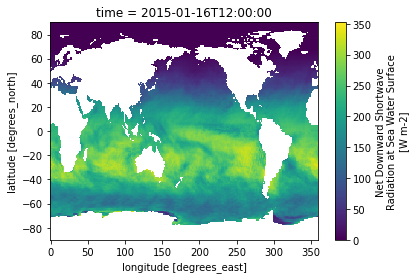

In [25]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.sel(time = "2015-01")
nc[variable].plot()

In [26]:
!cdo remapdis,r360x180 -selname,{variable} Data/Raw/rsntds_Omon_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_199501-201412.nc Data/{variable}_{model}_historical_remapped.nc

cdo(1) selname: Process started
cdo    remapdis: Distance-weighted average weights from curvilinear (802x404) to lonlat (360x180) grid, with source mask (208463)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo(1) selname: Processed 1 variable over 240 timesteps.
cdo    remapdis: Processed 77761920 values from 1 variable over 240 timesteps [12.32s 242MB].


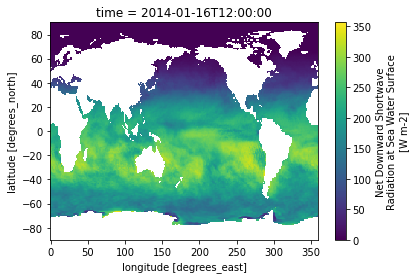

In [27]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.sel(time = "2014-01")
nc[variable].plot()

## Sea ice selection

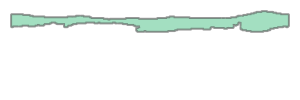

In [28]:
shape = gpd.read_file("Shapes/{}_extended_ice_margin.shp".format(model), crs = "EPSG:4326")
shape['geometry'][0]

In [29]:
ice = gpd.GeoSeries(shape['geometry'][0])

### ssp585

In [30]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.drop_vars("time_bnds")
nc

<xarray.Dataset>
Dimensions:  (time: 1032, lon: 360, lat: 180)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    rsntds   (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 20:37:35 2022: cdo remapdis,r360x180 -...
    source:                 MPI-ESM1.2-HR (2017): \naerosol: none, prescribed...
    institution:            Deutsches Klimarechenzentrum, Hamburg 20146, Germany
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variable_id:            rsntds
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by DKRZ is licensed und...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/5d0528e4-39ee-44e0-9e1e-bf9ee2833236
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [31]:
# Preparing nc file format for cropping
nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (time: 1032, lon: 360, lat: 180)
Coordinates:
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    spatial_ref  int64 0
Data variables:
    rsntds       (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 20:37:35 2022: cdo remapdis,r360x180 -...
    source:                 MPI-ESM1.2-HR (2017): \naerosol: none, prescribed...
    institution:            Deutsches Klimarechenzentrum, Hamburg 20146, Germany
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variable_id:            rsntds
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by DKRZ is licensed und...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/5d0528e4-39ee-44e0-9e1e-bf9ee2833236
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [32]:
clipped = nc.rio.clip(ice.geometry.values, crs = 4326, drop = False, all_touched = True)

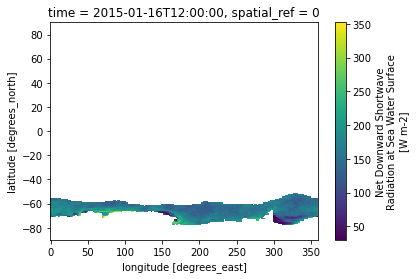

In [33]:
plot = clipped.sel(time = "2015-01")
plot[variable].plot()

In [34]:
clipped.to_netcdf(path = "Data/{}_{}_{}_cropped.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### historical


In [35]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.drop_vars("time_bnds")
nc

<xarray.Dataset>
Dimensions:  (time: 240, lon: 360, lat: 180)
Coordinates:
  * time     (time) datetime64[ns] 1995-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    rsntds   (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 20:38:22 2022: cdo remapdis,r360x180 -...
    source:                 MPI-ESM1.2-HR (2017): \naerosol: none, prescribed...
    institution:            Max Planck Institute for Meteorology
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variable_id:            rsntds
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/30c0cc23-3ca7-481a-9c8e-a1e2cab9d737
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [36]:
# Preparing nc file format for cropping
nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (time: 240, lon: 360, lat: 180)
Coordinates:
  * time         (time) datetime64[ns] 1995-01-16T12:00:00 ... 2014-12-16T12:...
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    spatial_ref  int64 0
Data variables:
    rsntds       (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 20:38:22 2022: cdo remapdis,r360x180 -...
    source:                 MPI-ESM1.2-HR (2017): \naerosol: none, prescribed...
    institution:            Max Planck Institute for Meteorology
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variable_id:            rsntds
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/30c0cc23-3ca7-481a-9c8e-a1e2cab9d737
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [37]:
clipped = nc.rio.clip(ice.geometry.values, crs = 4326, drop = False, all_touched = True)

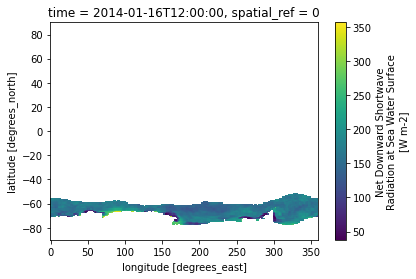

In [38]:
plot = clipped.sel(time = "2014-01")
plot[variable].plot()

In [39]:
clipped.to_netcdf(path = "Data/{}_{}_historical_cropped.nc".format(variable, model), mode = "w", format = "NETCDF4")

## 20 year of sea ice area 

### historical

In [40]:
# Mean of historial last 20 years
historical = xarray.open_dataset("Data/{}_{}_historical_cropped.nc".format(variable, model))
historical

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 1995-01-16T12:00:00 ... 2014-12-16T12:...
Data variables:
    spatial_ref  int64 ...
    rsntds       (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 20:38:22 2022: cdo remapdis,r360x180 -...
    source:                 MPI-ESM1.2-HR (2017): \naerosol: none, prescribed...
    institution:            Max Planck Institute for Meteorology
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variable_id:            rsntds
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/30c0cc23-3ca7-481a-9c8e-a1e2cab9d737
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [41]:
historical_cropped = historical.sel(time=slice('1995-01', '2014-12'))
historical_cropped = historical_cropped.drop_vars("spatial_ref")
historical_cropped

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 1995-01-16T12:00:00 ... 2014-12-16T12:00:00
Data variables:
    rsntds   (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 20:38:22 2022: cdo remapdis,r360x180 -...
    source:                 MPI-ESM1.2-HR (2017): \naerosol: none, prescribed...
    institution:            Max Planck Institute for Meteorology
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    variable_id:            rsntds
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/30c0cc23-3ca7-481a-9c8e-a1e2cab9d737
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [42]:
historical_mean = historical_cropped.mean("time")
historical_mean

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    rsntds   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

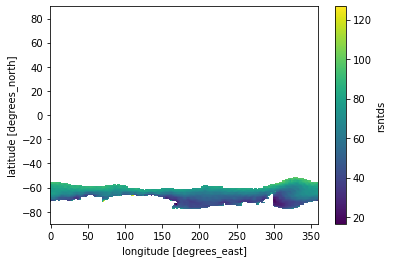

In [43]:
historical_mean[variable].plot()

In [44]:
historical_mean.to_netcdf(path = "Data/{}_{}_historical_20yr.nc".format(variable, model), mode = "w", format = "NETCDF4")

#### Season

In [45]:
historical_season = historical_cropped.resample(time='QS-DEC').mean(dim="time")

In [46]:
historical_summer = historical_season.sel(time=(historical_season.time.dt.month == 12))
historical_summer = historical_summer.sel(time = slice("1995","2014"))
historical_summer

<xarray.Dataset>
Dimensions:  (time: 20, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 1995-12-01 1996-12-01 ... 2014-12-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    rsntds   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [47]:
historical_summer = historical_summer.mean("time")
historical_summer.to_netcdf(path = "Data/{}_{}_historical_20yr_summer.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [48]:
historical_winter = historical_season.sel(time=(historical_season.time.dt.month == 6))

In [49]:
historical_winter = historical_winter.mean("time")
historical_winter.to_netcdf(path = "Data/{}_{}_historical_20yr_winter.nc".format(variable, model), mode = "w", format = "NETCDF4")

### ssp585

In [50]:
# Mean of ssp585 last 20 years
new = xarray.open_dataset("Data/{}_{}_{}_cropped.nc".format(variable, model, experiment))
new

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
Data variables:
    spatial_ref  int64 ...
    rsntds       (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 20:37:35 2022: cdo remapdis,r360x180 -...
    source:                 MPI-ESM1.2-HR (2017): \naerosol: none, prescribed...
    institution:            Deutsches Klimarechenzentrum, Hamburg 20146, Germany
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variable_id:            rsntds
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by DKRZ is licensed und...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/5d0528e4-39ee-44e0-9e1e-bf9ee2833236
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [51]:
new_cropped = new.sel(time=slice("2081-01","2100-12"))
new_cropped = new_cropped.drop_vars("spatial_ref")
new_cropped

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 2081-01-16T12:00:00 ... 2100-12-16T12:00:00
Data variables:
    rsntds   (time, lat, lon) float32 ...
Attributes: (12/49)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Tue Aug 09 20:37:35 2022: cdo remapdis,r360x180 -...
    source:                 MPI-ESM1.2-HR (2017): \naerosol: none, prescribed...
    institution:            Deutsches Klimarechenzentrum, Hamburg 20146, Germany
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    variable_id:            rsntds
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by DKRZ is licensed und...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/5d0528e4-39ee-44e0-9e1e-bf9ee2833236
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [52]:
new_mean = new_cropped.mean("time")
new_mean

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    rsntds   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

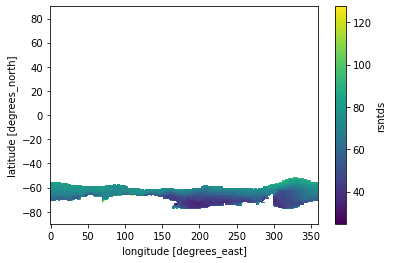

In [53]:
new_mean[variable].plot()

In [54]:
new_mean.to_netcdf(path = "Data/{}_{}_{}_20yr.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

In [55]:
new_median = new_cropped.median(["lat","lon"])
new_median

<xarray.Dataset>
Dimensions:  (time: 240)
Coordinates:
  * time     (time) datetime64[ns] 2081-01-16T12:00:00 ... 2100-12-16T12:00:00
Data variables:
    rsntds   (time) float32 138.7 108.6 60.5 23.91 ... 29.16 64.5 136.0 163.7

In [56]:
new_median_mean = new_median.mean()
new_median_mean

<xarray.Dataset>
Dimensions:  ()
Data variables:
    rsntds   float32 63.25

#### Season

In [57]:
new_season = new_cropped.resample(time='QS-DEC').mean(dim="time")

In [58]:
new_summer = new_season.sel(time=(new_season.time.dt.month == 12))
new_summer = new_summer.sel(time = slice("2081","2100"))
new_summer

<xarray.Dataset>
Dimensions:  (time: 20, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2081-12-01 2082-12-01 ... 2100-12-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    rsntds   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [59]:
new_summer = new_summer.mean("time")
new_summer.to_netcdf(path = "Data/{}_{}_{}_20yr_summer.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

In [60]:
new_winter = new_season.sel(time=(new_season.time.dt.month == 6))
new_winter

<xarray.Dataset>
Dimensions:  (time: 20, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2081-06-01 2082-06-01 ... 2100-06-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    rsntds   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [61]:
new_winter = new_winter.mean("time")
new_winter

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    rsntds   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [62]:
new_winter.to_netcdf(path = "Data/{}_{}_{}_20yr_winter.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### 20 year Difference 

In [5]:
# Calculate percentage difference
historical = xarray.open_dataset("Data/{}_{}_historical_20yr.nc".format(variable, model))
new = xarray.open_dataset("Data/{}_{}_{}_20yr.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    rsntds   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

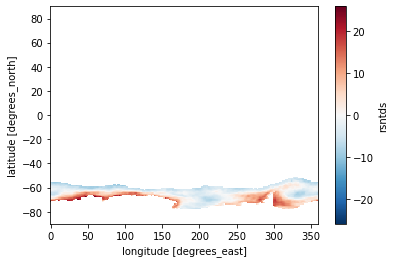

In [6]:
difference = new - historical
difference[variable].plot()
difference

In [65]:
difference.to_netcdf(path = "Data/{}_{}_{}_absolute.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

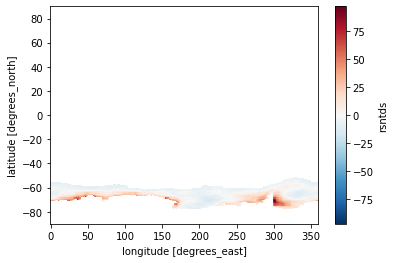

In [7]:
percentage = (difference/historical)*100
percentage[variable].plot()

In [67]:
percentage.to_netcdf(path = "Data/{}_{}_{}_percentage.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Summer

In [10]:
# summer
historical_summer = xarray.open_dataset("Data/{}_{}_historical_20yr_summer.nc".format(variable, model))
new_summer = xarray.open_dataset("Data/{}_{}_{}_20yr_summer.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    rsntds   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

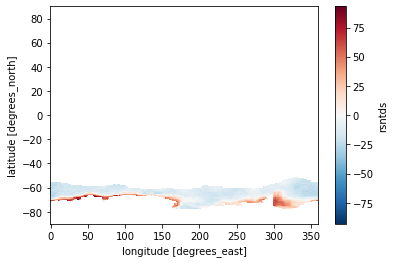

In [11]:
difference_summer = new_summer - historical_summer
difference_summer[variable].plot()
difference_summer

In [70]:
difference_summer.to_netcdf(path = "Data/{}_{}_{}_absolute_summer.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

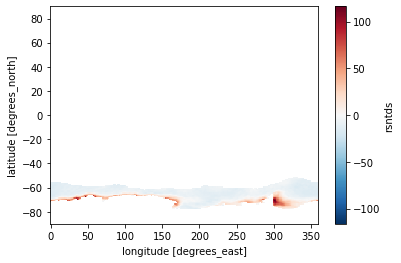

In [12]:
percentage_summer = (difference_summer/historical_summer)*100
percentage_summer[variable].plot()

In [72]:
percentage_summer.to_netcdf(path = "Data/{}_{}_{}_percentage_summer.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Winter


In [13]:
# Winter
historical_winter = xarray.open_dataset("Data/{}_{}_historical_20yr_winter.nc".format(variable, model))
new_winter = xarray.open_dataset("Data/{}_{}_{}_20yr_winter.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    rsntds   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

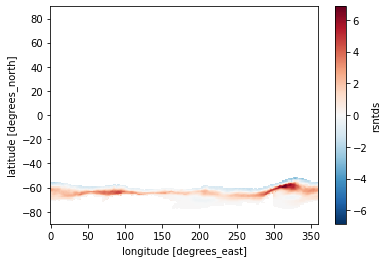

In [14]:
difference_winter = new_winter - historical_winter
difference_winter[variable].plot()
difference_winter

In [75]:
difference_winter.to_netcdf(path = "Data/{}_{}_{}_absolute_winter.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

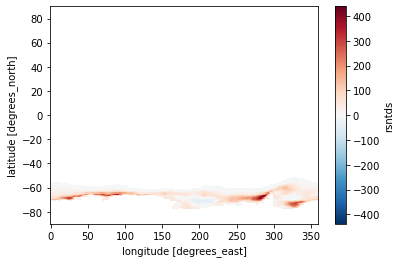

In [15]:
percentage_winter = (difference_winter/historical_winter)*100
percentage_winter[variable].plot()

In [77]:
percentage_winter.to_netcdf(path = "Data/{}_{}_{}_percentage_winter.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### Summary values

In [16]:
mean = (percentage.mean())[variable].values
median = (percentage.median())[variable].values
max_value = (percentage.max())[variable].values
min_value = (percentage.min())[variable].values

mean_abs = (difference.mean())[variable].values
median_abs = (difference.median())[variable].values
max_value_abs = (difference.max())[variable].values
min_value_abs = (difference.min())[variable].values

print("Mean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean, mean_abs, median, median_abs,
                                                                                                          max_value, max_value_abs,
                                                                                                          min_value, min_value_abs))

Mean change = 4.280147075653076% 1.1089074611663818
Median change = -1.1275559663772583% -0.71630859375
Max inc = 97.0434341430664% 25.79638671875
Max dec = -16.129043579101562% -9.792556762695312


In [79]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "w")
summary.write("{} {}\n\nOverall:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(variable, model,
                                                                                                                           mean, mean_abs, 
                                                                                                                           median, median_abs,
                                                                                                          max_value, max_value_abs,
                                                                                                          min_value, min_value_abs))
summary.close()

#### Season

In [17]:
mean_summer = (percentage_summer.mean())[variable].values
median_summer = (percentage_summer.median())[variable].values
max_value_summer = (percentage_summer.max())[variable].values
min_value_summer = (percentage_summer.min())[variable].values


mean_abs_summer = (difference_summer.mean())[variable].values
median_abs_summer = (difference_summer.median())[variable].values
max_value_abs_summer = (difference_summer.max())[variable].values
min_value_abs_summer = (difference_summer.min())[variable].values

In [18]:
mean_winter = (percentage_winter.mean())[variable].values
median_winter = (percentage_winter.median())[variable].values
max_value_winter = (percentage_winter.max())[variable].values
min_value_winter = (percentage_winter.min())[variable].values

mean_abs_winter = (difference_winter.mean())[variable].values
median_abs_winter = (difference_winter.median())[variable].values
max_value_abs_winter = (difference_winter.max())[variable].values
min_value_abs_winter = (difference_winter.min())[variable].values

In [82]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nSummer:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean_summer, mean_abs_summer, 
                                                                                                                    median_summer, median_abs_summer,
                                                                                                          max_value_summer, max_value_abs_summer,
                                                                                                          min_value_summer, min_value_abs_summer))
summary.close()

In [83]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nWinter:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean_winter, mean_abs_winter, 
                                                                                                                     median_winter, median_abs_winter,
                                                                                                          max_value_winter, max_value_abs_winter,
                                                                                                          min_value_winter, min_value_abs_winter))
summary.close()

## Zonal Absolute/Percentage Change

In [19]:
inc = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
dec = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")

#### Increasing

In [20]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))

nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

inc_area = nc.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
inc_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    rsntds       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

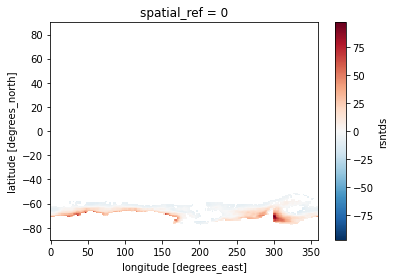

In [86]:
inc_area[variable].plot()

In [87]:
inc_area.to_netcdf(path = "Data/{}_{}_percentage_inc.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [21]:
ab = xarray.open_dataset("Data/{}_{}_{}_absolute.nc".format(variable, model, experiment))

ab.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
ab.rio.write_crs("epsg:4326", inplace=True)

ab_inc_area = ab.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
ab_inc_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    rsntds       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

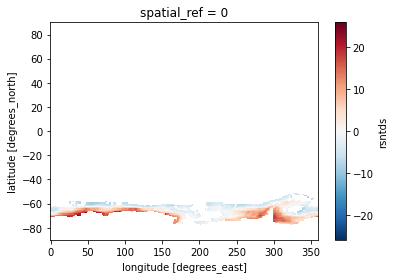

In [89]:
ab_inc_area[variable].plot()

In [90]:
ab_inc_area.to_netcdf(path = "Data/{}_{}_absolute_inc.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [22]:
inc_mean = (inc_area.mean())[variable].values
inc_median = (inc_area.median())[variable].values
inc_max_value = (inc_area.max())[variable].values
inc_min_value = (inc_area.min())[variable].values

inc_mean_abs = (ab_inc_area.mean())[variable].values
inc_median_abs = (ab_inc_area.median())[variable].values
inc_max_value_abs = (ab_inc_area.max())[variable].values
inc_min_value_abs = (ab_inc_area.min())[variable].values

print("Mean change = {}% {}\n Max inc = {}% {}\n Max dec = {}% {}\n".format(inc_mean, inc_mean_abs, 
                                                                            inc_max_value, inc_max_value_abs,
                                                                            inc_min_value, inc_min_value_abs))

Mean change = 7.204989910125732% 2.5582022666931152
 Max inc = 97.0434341430664% 25.79638671875
 Max dec = -12.028502464294434% -9.141769409179688



In [92]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nIncreasing zone:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}\n".format(inc_mean, inc_mean_abs, 
                                                                                                                                  inc_median, inc_median_abs,
                                                                            inc_max_value, inc_max_value_abs,
                                                                            inc_min_value, inc_min_value_abs))
summary.close()

#### Decreasing

In [23]:
dec_area = nc.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
dec_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    rsntds       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

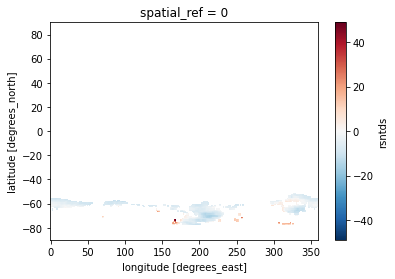

In [94]:
dec_area[variable].plot()

In [95]:
dec_area.to_netcdf(path = "Data/{}_{}_percentage_dec.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [24]:
ab_dec_area = ab.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
ab_dec_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    rsntds       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

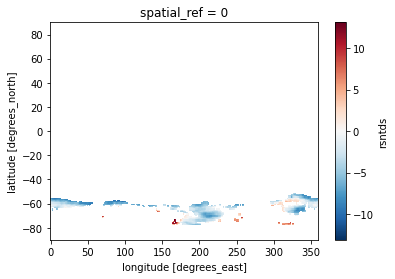

In [97]:
ab_dec_area[variable].plot()

In [98]:
ab_dec_area.to_netcdf(path = "Data/{}_{}_absolute_dec.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [25]:
dec_mean = (dec_area.mean())[variable].values
dec_median = (dec_area.median())[variable].values
dec_max_value = (dec_area.max())[variable].values
dec_min_value = (dec_area.min())[variable].values

dec_mean_abs = (ab_dec_area.mean())[variable].values
dec_median_abs = (ab_dec_area.median())[variable].values
dec_max_value_abs = (ab_dec_area.max())[variable].values
dec_min_value_abs = (ab_dec_area.min())[variable].values

print("Mean change = {}% {}\n Max inc = {}% {}\n Max dec = {}% {}\n".format(dec_mean, dec_mean_abs, 
                                                                            dec_max_value, dec_max_value_abs,
                                                                            dec_min_value, dec_min_value_abs))

Mean change = -4.419093608856201% -3.148021697998047
 Max inc = 48.9366569519043% 13.081327438354492
 Max dec = -16.129043579101562% -9.792556762695312



In [100]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nDecreasing zone:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}\n".format(dec_mean, dec_mean_abs, 
                                                                                                                                dec_median, dec_median_abs,
                                                                            dec_max_value, dec_max_value_abs,
                                                                            dec_min_value, dec_min_value_abs))
summary.close()

In [26]:
data = {'Model' : model,
        'Variable' : name,
        'Percentage change' : [median],
        'Absolute change' : [median_abs]}
df = pd.DataFrame(data)
df

,Model,Variable,Percentage change,Absolute change
0,MPI-ESM1-2-HR,PAR,-1.1275559663772583,-0.71630859375


In [27]:
df.to_csv("csv/Whole_change.csv", mode = "a", index = False, header=False)

In [28]:
data = {'Model' : [model, model],
        'Variable' : [name, name],
        'Percentage change' : [median_summer, median_winter],
        'Absolute change' : [median_abs_summer, median_abs_winter],
       "Season" : ["Summer", "Winter"]}
df = pd.DataFrame(data)
df

,Model,Variable,Percentage change,Absolute change,Season
0,MPI-ESM1-2-HR,PAR,-7.3678693771362305,-10.879379272460938,Summer
1,MPI-ESM1-2-HR,PAR,27.033849716186523,0.33788561820983887,Winter


In [29]:
df.to_csv("csv/Season_change.csv", mode = "a", index = False, header=False)

In [30]:
data = {'Model' : [model, model],
        'Variable' : [name, name],
        'Percentage change' : [inc_median, dec_median],
        'Absolute change' : [inc_median_abs, dec_median_abs],
       "Zone" : ["Inc", "Dec"]}
df = pd.DataFrame(data)
df

,Model,Variable,Percentage change,Absolute change,Zone
0,MPI-ESM1-2-HR,PAR,1.8557496070861816,1.1154327392578125,Inc
1,MPI-ESM1-2-HR,PAR,-5.535353183746338,-3.5289459228515625,Dec


In [31]:
df.to_csv("csv/Zone_change.csv", mode = "a", index = False, header=False)

## Absolute map

##### Mapping

In [50]:
inc = gpd.read_file("Shapes/{}_inc_remapped_improved.shp".format(model))
dec = gpd.read_file("Shapes/{}_dec_remapped_improved.shp".format(model))

DriverError: Shapes/IPSL-CM6A-LR_inc_remapped_improved.shp: No such file or directory

In [101]:
# Finding max/min value between the two years
old = xarray.open_dataset("Data/{}_{}_historical_20yr.nc".format(variable, model))
new = xarray.open_dataset("Data/{}_{}_{}_20yr.nc".format(variable, model, experiment))

In [102]:
lat_old = old['lat'].values 
lon_old = old['lon'].values
var_old = old[variable].values

#var_old = np.nanmean(var_old, axis = 0) 

old_max = np.nanmax(var_old)
old_min = np.nanmin(var_old)
print(old_max, old_min)


var_old, lon_old = add_cyclic_point(var_old, coord=lon_old)
x, y = np.meshgrid(lon_old, lat_old)

126.61614 16.5174


In [103]:
lat_new = new['lat'].values 
lon_new = new['lon'].values
var_new = new[variable].values

#var_new = np.nanmean(var_new, axis = 0) 

new_max = np.nanmax(var_new)
new_min = np.nanmin(var_new)
print(new_max, new_min)


var_new, lon_new = add_cyclic_point(var_new, coord=lon_new)
x_new, y_new = np.meshgrid(lon_new, lat_new)

127.54348 24.773306


In [104]:
overall_max = max(old_max, new_max)
overall_min = min(old_min, new_min)
print(overall_max, overall_min)

127.54348 16.5174


/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ 

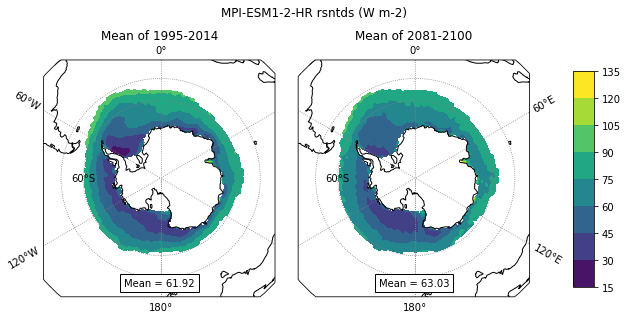

In [105]:
fig = plt.figure(figsize=[10, 5])
ax1 = fig.add_subplot(1, 2, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax2 = fig.add_subplot(1, 2, 2, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                               sharex=ax1, sharey=ax1)
fig.subplots_adjust(wspace=0.1)

plt.suptitle("{} {} ({})".format(model, variable, unit))


# 2014 plot
ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl1.right_labels = False

gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



ax1.title.set_text('Mean of 1995-2014')

p = ax1.contourf(x, y, var_old,
                vmax = overall_max, vmin = overall_min,
                cmap = 'viridis',
                transform = cartopy.crs.PlateCarree())

ax1.coastlines()

# ax1.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax1.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')


mean2014 = AnchoredText("Mean = {0:.2f}".format(old.mean()[variable].values), loc="lower center")
ax1.add_artist(mean2014)


# 2100 plot
ax2.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl2 = ax2.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl2.left_labels = False

gl2.ylabel_style = {'size': 10}
gl2.xlabel_style = {'size': 10}

gl2.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl2.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])

ax2.title.set_text('Mean of 2081-2100')

p2 = ax2.contourf(x_new, y_new, var_new,
                vmax = overall_max, vmin = overall_min,
                cmap = 'viridis',
                transform = cartopy.crs.PlateCarree())

ax2.coastlines()

# ax2.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax2.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')

mean2100 = AnchoredText("Mean = {0:.2f}".format(new.mean()[variable].values), loc="lower center")
ax2.add_artist(mean2100)



### Colorbar
fig.subplots_adjust(right=0.8) # Move all subplots 0.2 away from the right
cbar_ax = fig.add_axes([0.86, 0.2, 0.03, 0.6]) # Define position and size of new element (distance from left, distance from bottom, width, height)
fig.colorbar(p, cax=cbar_ax)


plt.savefig("output/{}/{}_{}_2014vs2100.png".format(model, variable, model))

plt.show()

## Percentage Change map

In [106]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))
nc

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    rsntds   (lat, lon) float32 ...

In [107]:
lat = nc['lat'].values 
lon = nc['lon'].values
var = nc[variable].values

var_max = np.nanmax(var)
var_min = np.nanmin(var)

var_upper = np.nanquantile(var[var>0], 0.9)
var_lower = np.nanquantile(var[var<0], 0.1)
label = abs(max([var_upper, var_lower], key = abs))
print(var_upper, var_lower)
print(var_max, var_min)

var, lon = add_cyclic_point(var, coord=lon)
x, y = np.meshgrid(lon, lat)

35.612422180175784 -9.571025753021239
97.043434 -16.129044


In [58]:
inc = gpd.read_file("Shapes/{}_inc_remapped_improved.shp".format(model))
dec = gpd.read_file("Shapes/{}_dec_remapped_improved.shp".format(model))

DriverError: Shapes/IPSL-CM6A-LR_inc_remapped_improved.shp: No such file or directory

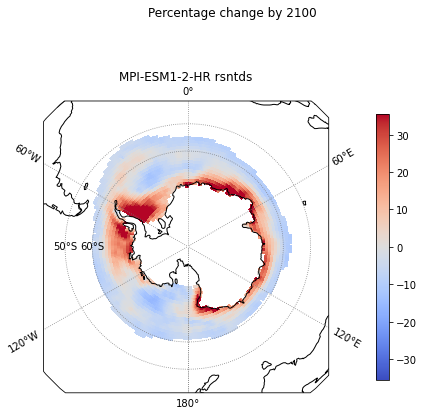

In [108]:
fig = plt.figure(figsize=[7, 7])
ax1 = fig.add_subplot(1, 1, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))


plt.suptitle("Percentage change by 2100")


ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 


gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



ax1.title.set_text("{} {}".format(model, variable))

divnorm = colors.TwoSlopeNorm(vmin = -label, vcenter = 0., vmax = label)
#divnorm = colors.TwoSlopeNorm(vmin = var_min, vcenter = 0., vmax = var_max)

p = ax1.pcolor(x, y, var, 
              cmap = 'coolwarm', norm = divnorm, transform = cartopy.crs.PlateCarree() )


ax1.coastlines()

# ax1.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax1.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')

cb = plt.colorbar(p, shrink=0.7, pad = 0.12)

plt.savefig("output/{}/{}_{}_percentage_change.png".format(model, variable, model))

plt.show()

## Correlation with epc100

### Whole


In [31]:
current_per = xarray.open_dataarray("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment), decode_coords="all")
exp_per = xarray.open_dataarray("Data/epc100_{}_{}_percentage.nc".format(model, experiment), decode_coords="all")

In [32]:
cor_per = xarray.corr(current_per, exp_per, dim = ["lat", "lon"])
cor_per

<xarray.DataArray ()>
array(0.79594956)
Coordinates:
    depth    float64 100.0

In [33]:
cor_per_p = xs.pearson_r_p_value(current_per, exp_per, dim = ["lat", "lon"], skipna=True)
cor_per_p.values

array(0.)

In [34]:
export = 66.42532064542822

In [35]:
cor_ken, cor_ken_p = kendalltau(current_per.values, exp_per.values, nan_policy="omit")
print(cor_ken, cor_ken_p)

0.557049374261622 0.0


In [36]:
data = {'Percentage': [median], 
        'Correlation': [cor_per.values],
        'p-value': [cor_per_p.values],
        'Kendall': [cor_ken], 
        'p_value_k': [cor_ken_p],
        'Variable': name,
        'Model': model,
        'Export': [export]}
df = pd.DataFrame(data)
df

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Export
0,-1.1275559663772583,0.7959495583969317,0.0,0.557049,0.0,PAR,MPI-ESM1-2-HR,66.425321


In [37]:
df.to_csv("csv/Whole.csv", mode = "a", index = False, header=False)

### Zonal

#### Inc

In [38]:
current_inc_per = xarray.open_dataarray("Data/{}_{}_percentage_inc.nc".format(variable, model), decode_coords="all")
exp_inc_per = xarray.open_dataarray("Data/epc100_{}_percentage_inc.nc".format(model), decode_coords="all")

In [39]:
cor_inc_per = xarray.corr(current_inc_per, exp_inc_per, dim = ["lat", "lon"])
cor_inc_per

<xarray.DataArray ()>
array(0.77702883)
Coordinates:
    spatial_ref  int64 0
    depth        float64 100.0

In [40]:
cor_inc_per_p = xs.pearson_r_p_value(current_inc_per, exp_inc_per, dim = ["lat", "lon"], skipna=True)
cor_inc_per_p.values

array(0.)

In [41]:
cor_ken_inc, cor_ken_p_inc = kendalltau(current_inc_per.values, exp_inc_per.values, nan_policy="omit")
print(cor_ken_inc, cor_ken_p_inc)

0.5484293545087108 0.0


#### Dec

In [42]:
current_dec_per = xarray.open_dataarray("Data/{}_{}_percentage_dec.nc".format(variable, model), decode_coords="all")
exp_dec_per = xarray.open_dataarray("Data/epc100_{}_percentage_dec.nc".format(model), decode_coords="all")

In [43]:
cor_dec_per = xarray.corr(current_dec_per, exp_dec_per, dim = ["lat", "lon"])
cor_dec_per

<xarray.DataArray ()>
array(0.32920138)
Coordinates:
    spatial_ref  int64 0
    depth        float64 100.0

In [44]:
cor_dec_per_p = xs.pearson_r_p_value(current_dec_per, exp_dec_per, dim = ["lat", "lon"], skipna=True)
cor_dec_per_p.values

array(2.06134087e-53)

In [45]:
cor_ken_dec, cor_ken_p_dec = kendalltau(current_dec_per.values, exp_dec_per.values, nan_policy="omit")
print(cor_ken_dec, cor_ken_p_dec)

0.17798231671600795 7.82941662103797e-34


In [46]:
data = {'Percentage': [inc_median, dec_median],
        'Correlation': [cor_inc_per.values, cor_dec_per.values],
        'p-value': [cor_inc_per_p.values, cor_dec_per_p.values],
        'Kendall': [cor_ken_inc, cor_ken_dec], 
        'p_value_k': [cor_ken_p_inc, cor_ken_p_dec],
        'Variable': [name, name],
        'Model': [model, model],
       'Zone': ["inc", "dec"]}
df = pd.DataFrame(data)
df

,Percentage,Correlation,p-value,Kendall,p_value_k,Variable,Model,Zone
0,1.8557496070861816,0.7770288319073767,0.0,0.548429,0.000000e+00,PAR,MPI-ESM1-2-HR,inc
1,-5.535353183746338,0.3292013844180584,2.061340865557343e-53,0.177982,7.829417e-34,PAR,MPI-ESM1-2-HR,dec


In [47]:
df.to_csv("csv/Zone.csv", mode = "a", index = False, header=False)

### Seasonal

#### Summer

In [48]:
current_summer_per = xarray.open_dataarray("Data/{}_{}_{}_percentage_summer.nc".format(variable, model, experiment), decode_coords="all")
exp_summer_per = xarray.open_dataarray("Data/epc100_{}_{}_percentage_summer.nc".format(model, experiment), decode_coords="all")

In [49]:
cor_summer_per = xarray.corr(current_summer_per, exp_summer_per, dim = ["lat", "lon"])
cor_summer_per

<xarray.DataArray ()>
array(0.72792156)
Coordinates:
    depth    float64 100.0

In [50]:
cor_summer_per_p = xs.pearson_r_p_value(current_summer_per, exp_summer_per, dim = ["lat", "lon"], skipna=True)
cor_summer_per_p.values

array(0.)

In [51]:
cor_ken_summer, cor_ken_p_summer = kendalltau(current_summer_per.values, exp_summer_per.values, nan_policy="omit")
print(cor_ken_summer, cor_ken_summer)

0.540845438409806 0.540845438409806


#### Winter

In [52]:
current_winter_per = xarray.open_dataarray("Data/{}_{}_{}_percentage_winter.nc".format(variable, model, experiment), decode_coords="all")
exp_winter_per = xarray.open_dataarray("Data/epc100_{}_{}_percentage_winter.nc".format(model, experiment), decode_coords="all")

In [53]:
cor_winter_per = xarray.corr(current_winter_per, exp_winter_per, dim = ["lat", "lon"])
cor_winter_per

<xarray.DataArray ()>
array(0.13995966)
Coordinates:
    depth    float64 100.0

In [54]:
cor_winter_per_p = xs.pearson_r_p_value(current_winter_per, exp_winter_per, dim = ["lat", "lon"], skipna=True)
cor_winter_per_p.values

array(1.41884434e-22)

In [55]:
cor_ken_winter, cor_ken_p_winter = kendalltau(current_winter_per.values, exp_winter_per.values, nan_policy="omit")
print(cor_ken_winter, cor_ken_p_winter)

0.16272506637605116 1.5030208263861339e-64


In [56]:
data = {'Percentage_summer': [median_summer, median_winter],
        'Correlation_summer': [cor_summer_per.values, cor_winter_per.values],
        'p-value_summer': [cor_summer_per_p.values, cor_winter_per_p.values],
        'Kendall': [cor_ken_summer, cor_ken_winter], 
        'p_value_k': [cor_ken_p_summer, cor_ken_p_winter],
        'Variable': [name, name],
        'Model': [model, model],
        'Season': ["summer", "winter"]
       }
df = pd.DataFrame(data)
df

,Percentage_summer,Correlation_summer,p-value_summer,Kendall,p_value_k,Variable,Model,Season
0,-7.3678693771362305,0.7279215585501665,0.0,0.540845,0.000000e+00,PAR,MPI-ESM1-2-HR,summer
1,27.033849716186523,0.13995965552537037,1.418844337912372e-22,0.162725,1.503021e-64,PAR,MPI-ESM1-2-HR,winter


In [57]:
df.to_csv("csv/Season.csv", mode = "a", index = False, header=False)

## Correlation with siconc

### Whole


In [5]:
current_per = xarray.open_dataarray("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment), decode_coords="all")
current_per
exp_per = xarray.open_dataarray("Data/siconc_{}_{}_percentage.nc".format(model, experiment), decode_coords="all")

In [6]:
cor_per = xarray.corr(current_per, exp_per, dim = ["lat", "lon"])
cor_per

<xarray.DataArray ()>
array(0.32606975)

In [7]:
cor_per_p = xs.pearson_r_p_value(current_per, exp_per, dim = ["lat", "lon"], skipna=True)
cor_per_p.values

array(1.6067461e-121)

In [8]:
cor_ken, cor_ken_p = kendalltau(current_per.values, exp_per.values, nan_policy="omit")
print(cor_ken, cor_ken_p)

0.22313000438705274 2.705777623684095e-119


In [9]:
data = {'Correlation': [cor_per.values],
        'p-value': [cor_per_p.values],
        'Variable': name,
        'Model': model,
       'Correlation_ice_k': [cor_ken],
        'p-value_ice_k': [cor_ken_p]}
df = pd.DataFrame(data)
df

,Correlation,p-value,Variable,Model,Correlation_ice_k,p-value_ice_k
0,0.3260697473352501,1.6067460988328707e-121,PAR,MPI-ESM1-2-HR,0.22313,2.705778e-119


In [10]:
df.to_csv("csv/Whole_ice.csv", mode = "a", index = False, header=False)

### Zonal

#### Inc

In [11]:
current_inc_per = xarray.open_dataarray("Data/{}_{}_percentage_inc.nc".format(variable, model), decode_coords="all")
exp_inc_per = xarray.open_dataarray("Data/siconc_{}_percentage_inc.nc".format(model), decode_coords="all")

In [12]:
cor_inc_per = xarray.corr(current_inc_per, exp_inc_per, dim = ["lat", "lon"])
cor_inc_per

<xarray.DataArray ()>
array(0.45464451)
Coordinates:
    spatial_ref  int64 0

In [13]:
cor_inc_per_p = xs.pearson_r_p_value(current_inc_per, exp_inc_per, dim = ["lat", "lon"], skipna=True)
cor_inc_per_p.values

array(1.64427728e-188)

In [14]:
cor_ken_inc, cor_ken_p_inc = kendalltau(current_inc_per.values, exp_inc_per.values, nan_policy="omit")
print(cor_ken_inc, cor_ken_p_inc)

0.3451891969542488 1.9813658984914183e-215


#### Dec

In [15]:
current_dec_per = xarray.open_dataarray("Data/{}_{}_percentage_dec.nc".format(variable, model), decode_coords="all")
exp_dec_per = xarray.open_dataarray("Data/siconc_{}_percentage_dec.nc".format(model), decode_coords="all")

In [16]:
cor_dec_per = xarray.corr(current_dec_per, exp_dec_per, dim = ["lat", "lon"])
cor_dec_per

<xarray.DataArray ()>
array(0.05171989)
Coordinates:
    spatial_ref  int64 0

In [17]:
cor_dec_per_p = xs.pearson_r_p_value(current_dec_per, exp_dec_per, dim = ["lat", "lon"], skipna=True)
cor_dec_per_p.values

array(0.01875228)

In [18]:
cor_ken_dec, cor_ken_p_dec = kendalltau(current_dec_per.values, exp_dec_per.values, nan_policy="omit")
print(cor_ken_dec, cor_ken_p_dec)

0.010301438198974345 0.48854733479130885


In [19]:
data = {'Correlation': [cor_inc_per.values, cor_dec_per.values],
        'p-value': [cor_inc_per_p.values, cor_dec_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
       'Zone': ["inc", "dec"],
       'Correlation_ice_k': [cor_ken_inc, cor_ken_dec],
        'p-value_ice_k': [cor_ken_p_inc, cor_ken_p_dec]}
df = pd.DataFrame(data)
df

,Correlation,p-value,Variable,Model,Zone,Correlation_ice_k,p-value_ice_k
0,0.4546445130142412,1.6442772807002983e-188,PAR,MPI-ESM1-2-HR,inc,0.345189,1.981366e-215
1,0.051719887560406054,0.01875227633256706,PAR,MPI-ESM1-2-HR,dec,0.010301,4.885473e-01


In [20]:
df.to_csv("csv/Zone_ice.csv", mode = "a", index = False, header=False)

### Seasonal

#### Summer

In [21]:
current_summer_per = xarray.open_dataarray("Data/{}_{}_{}_percentage_summer.nc".format(variable, model, experiment), decode_coords="all")
exp_summer_per = xarray.open_dataarray("Data/siconc_{}_{}_percentage_summer.nc".format(model, experiment), decode_coords="all")

In [22]:
cor_summer_per = xarray.corr(current_summer_per, exp_summer_per, dim = ["lat", "lon"])
cor_summer_per

<xarray.DataArray ()>
array(0.22195475)

In [23]:
cor_summer_per_p = xs.pearson_r_p_value(current_summer_per, exp_summer_per, dim = ["lat", "lon"], skipna=True)
cor_summer_per_p.values

array(7.50003376e-42)

In [24]:
cor_ken_summer, cor_ken_p_summer = kendalltau(current_summer_per.values, exp_summer_per.values, nan_policy="omit")
print(cor_ken_summer, cor_ken_summer)

0.2992973352031148 0.2992973352031148


#### Winter

In [25]:
current_winter_per = xarray.open_dataarray("Data/{}_{}_{}_percentage_winter.nc".format(variable, model, experiment), decode_coords="all")
exp_winter_per = xarray.open_dataarray("Data/siconc_{}_{}_percentage_winter.nc".format(model, experiment), decode_coords="all")

In [26]:
exp_winter_per_inf = exp_winter_per.where(exp_winter_per != np.inf)

In [27]:
cor_winter_per = xarray.corr(current_winter_per, exp_winter_per_inf, dim = ["lat", "lon"])
cor_winter_per

<xarray.DataArray ()>
array(-0.00874126)

In [28]:
cor_winter_per_p = xs.pearson_r_p_value(current_winter_per, exp_winter_per_inf, dim = ["lat", "lon"], skipna=True)
cor_winter_per_p.values

array(0.54503725)

In [29]:
cor_ken_winter, cor_ken_p_winter = kendalltau(current_winter_per.values, exp_winter_per.values, nan_policy="omit")
print(cor_ken_winter, cor_ken_p_winter)

0.2311862212772854 4.962979792474656e-124


In [30]:
data = {'Correlation_summer': [cor_summer_per.values, cor_winter_per.values],
        'p-value_summer': [cor_summer_per_p.values, cor_winter_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
        'Season': ["summer", "winter"],
        'Correlation_ice_k': [cor_ken_summer, cor_ken_winter],
        'p-value_ice_k': [cor_ken_p_summer, cor_ken_p_winter]
       }
df = pd.DataFrame(data)
df

,Correlation_summer,p-value_summer,Variable,Model,Season,Correlation_ice_k,p-value_ice_k
0,0.2219547510259315,7.500033760369758e-42,PAR,MPI-ESM1-2-HR,summer,0.299297,1.761860e-155
1,-0.00874125566102167,0.5450372502057796,PAR,MPI-ESM1-2-HR,winter,0.231186,4.962980e-124


In [31]:
df.to_csv("csv/Season_ice.csv", mode = "a", index = False, header=False)

## Correlation with NPP

### Whole


In [32]:
current_per = xarray.open_dataarray("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment), decode_coords="all")
current_per
exp_per = xarray.open_dataarray("Data/intpp_{}_{}_percentage.nc".format(model, experiment), decode_coords="all")

In [33]:
cor_per = xarray.corr(current_per, exp_per, dim = ["lat", "lon"])
cor_per

<xarray.DataArray ()>
array(0.83884683)

In [34]:
cor_per_p = xs.pearson_r_p_value(current_per, exp_per, dim = ["lat", "lon"], skipna=True)
cor_per_p.values

array(0.)

In [35]:
cor_ken, cor_ken_p = kendalltau(current_per.values, exp_per.values, nan_policy="omit")
print(cor_ken, cor_ken_p)

0.586524200911878 0.0


In [36]:
data = {'Correlation': [cor_per.values],
        'p-value': [cor_per_p.values],
        'Variable': name,
        'Model': model,
       'Correlation_ice_k': [cor_ken],
        'p-value_ice_k': [cor_ken_p]}
df = pd.DataFrame(data)
df

,Correlation,p-value,Variable,Model,Correlation_ice_k,p-value_ice_k
0,0.8388468299888004,0.0,PAR,MPI-ESM1-2-HR,0.586524,0.0


In [37]:
df.to_csv("csv/Whole_npp.csv", mode = "a", index = False, header=False)

### Zonal

#### Inc

In [38]:
current_inc_per = xarray.open_dataarray("Data/{}_{}_percentage_inc.nc".format(variable, model), decode_coords="all")
exp_inc_per = xarray.open_dataarray("Data/intpp_{}_percentage_inc.nc".format(model), decode_coords="all")

In [39]:
cor_inc_per = xarray.corr(current_inc_per, exp_inc_per, dim = ["lat", "lon"])
cor_inc_per

<xarray.DataArray ()>
array(0.83022414)
Coordinates:
    spatial_ref  int64 0

In [40]:
cor_inc_per_p = xs.pearson_r_p_value(current_inc_per, exp_inc_per, dim = ["lat", "lon"], skipna=True)
cor_inc_per_p.values

array(0.)

In [41]:
cor_ken_inc, cor_ken_p_inc = kendalltau(current_inc_per.values, exp_inc_per.values, nan_policy="omit")
print(cor_ken_inc, cor_ken_p_inc)

0.596319840029588 0.0


#### Dec

In [42]:
current_dec_per = xarray.open_dataarray("Data/{}_{}_percentage_dec.nc".format(variable, model), decode_coords="all")
exp_dec_per = xarray.open_dataarray("Data/intpp_{}_percentage_dec.nc".format(model), decode_coords="all")

In [43]:
cor_dec_per = xarray.corr(current_dec_per, exp_dec_per, dim = ["lat", "lon"])
cor_dec_per

<xarray.DataArray ()>
array(0.3959853)
Coordinates:
    spatial_ref  int64 0

In [44]:
cor_dec_per_p = xs.pearson_r_p_value(current_dec_per, exp_dec_per, dim = ["lat", "lon"], skipna=True)
cor_dec_per_p.values

array(8.06639242e-79)

In [45]:
cor_ken_dec, cor_ken_p_dec = kendalltau(current_dec_per.values, exp_dec_per.values, nan_policy="omit")
print(cor_ken_dec, cor_ken_p_dec)

0.20248071708577145 1.9264821159447902e-43


In [46]:
data = {'Correlation': [cor_inc_per.values, cor_dec_per.values],
        'p-value': [cor_inc_per_p.values, cor_dec_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
       'Zone': ["inc", "dec"],
       'Correlation_ice_k': [cor_ken_inc, cor_ken_dec],
        'p-value_ice_k': [cor_ken_p_inc, cor_ken_p_dec]}
df = pd.DataFrame(data)
df

,Correlation,p-value,Variable,Model,Zone,Correlation_ice_k,p-value_ice_k
0,0.8302241422136483,0.0,PAR,MPI-ESM1-2-HR,inc,0.596320,0.000000e+00
1,0.39598529924021375,8.066392422545429e-79,PAR,MPI-ESM1-2-HR,dec,0.202481,1.926482e-43


In [47]:
df.to_csv("csv/Zone_npp.csv", mode = "a", index = False, header=False)

### Seasonal

#### Summer

In [48]:
current_summer_per = xarray.open_dataarray("Data/{}_{}_{}_percentage_summer.nc".format(variable, model, experiment), decode_coords="all")
exp_summer_per = xarray.open_dataarray("Data/intpp_{}_{}_percentage_summer.nc".format(model, experiment), decode_coords="all")

In [49]:
cor_summer_per = xarray.corr(current_summer_per, exp_summer_per, dim = ["lat", "lon"])
cor_summer_per

<xarray.DataArray ()>
array(0.76013074)

In [50]:
cor_summer_per_p = xs.pearson_r_p_value(current_summer_per, exp_summer_per, dim = ["lat", "lon"], skipna=True)
cor_summer_per_p.values

array(0.)

In [51]:
cor_ken_summer, cor_ken_p_summer = kendalltau(current_summer_per.values, exp_summer_per.values, nan_policy="omit")
print(cor_ken_summer, cor_ken_summer)

0.5265396248013458 0.5265396248013458


#### Winter

In [52]:
current_winter_per = xarray.open_dataarray("Data/{}_{}_{}_percentage_winter.nc".format(variable, model, experiment), decode_coords="all")
exp_winter_per = xarray.open_dataarray("Data/intpp_{}_{}_percentage_winter.nc".format(model, experiment), decode_coords="all")

In [53]:
cor_winter_per = xarray.corr(current_winter_per, exp_winter_per, dim = ["lat", "lon"])
cor_winter_per

<xarray.DataArray ()>
array(0.9400185)

In [54]:
cor_winter_per_p = xs.pearson_r_p_value(current_winter_per, exp_winter_per, dim = ["lat", "lon"], skipna=True)
cor_winter_per_p.values

array(0.)

In [55]:
cor_ken_winter, cor_ken_p_winter = kendalltau(current_winter_per.values, exp_winter_per.values, nan_policy="omit")
print(cor_ken_winter, cor_ken_p_winter)

0.747690422717951 0.0


In [56]:
data = {'Correlation_summer': [cor_summer_per.values, cor_winter_per.values],
        'p-value_summer': [cor_summer_per_p.values, cor_winter_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
        'Season': ["summer", "winter"],
        'Correlation_ice_k': [cor_ken_summer, cor_ken_winter],
        'p-value_ice_k': [cor_ken_p_summer, cor_ken_p_winter]
       }
df = pd.DataFrame(data)
df

,Correlation_summer,p-value_summer,Variable,Model,Season,Correlation_ice_k,p-value_ice_k
0,0.7601307410332637,0.0,PAR,MPI-ESM1-2-HR,summer,0.52654,0.0
1,0.9400184969450214,0.0,PAR,MPI-ESM1-2-HR,winter,0.74769,0.0


In [57]:
df.to_csv("csv/Season_npp.csv", mode = "a", index = False, header=False)

## Correlation with epc100

### Whole


In [5]:
current_per = xarray.open_dataarray("Data/{}_{}_{}_absolute.nc".format(variable, model, experiment), decode_coords="all")
current_per
exp_per = xarray.open_dataarray("Data/epc100_{}_{}_absolute.nc".format(model, experiment), decode_coords="all")

In [6]:
cor_per = xarray.corr(current_per, exp_per, dim = ["lat", "lon"])
cor_per

<xarray.DataArray ()>
array(0.72645388)
Coordinates:
    depth    float64 100.0

In [7]:
cor_per_p = xs.pearson_r_p_value(current_per, exp_per, dim = ["lat", "lon"], skipna=True)
cor_per_p.values

array(0.)

In [8]:
data = {'Correlation': [cor_per.values],
        'p-value': [cor_per_p.values],
        'Variable': name,
        'Model': model}
df = pd.DataFrame(data)
df

,Correlation,p-value,Variable,Model
0,0.7264538837888712,0.0,PAR,MPI-ESM1-2-HR


In [9]:
df.to_csv("csv/Whole_absolute_export.csv", mode = "a", index = False, header=False)

### Zonal

#### Inc

In [10]:
current_inc_per = xarray.open_dataarray("Data/{}_{}_absolute_inc.nc".format(variable, model), decode_coords="all")
exp_inc_per = xarray.open_dataarray("Data/epc100_{}_absolute_inc.nc".format(model), decode_coords="all")

In [11]:
cor_inc_per = xarray.corr(current_inc_per, exp_inc_per, dim = ["lat", "lon"])
cor_inc_per

<xarray.DataArray ()>
array(0.69226443)
Coordinates:
    spatial_ref  int64 0
    depth        float64 100.0

In [12]:
cor_inc_per_p = xs.pearson_r_p_value(current_inc_per, exp_inc_per, dim = ["lat", "lon"], skipna=True)
cor_inc_per_p.values

array(0.)

#### Dec

In [13]:
current_dec_per = xarray.open_dataarray("Data/{}_{}_absolute_dec.nc".format(variable, model), decode_coords="all")
exp_dec_per = xarray.open_dataarray("Data/epc100_{}_absolute_dec.nc".format(model), decode_coords="all")

In [14]:
cor_dec_per = xarray.corr(current_dec_per, exp_dec_per, dim = ["lat", "lon"])
cor_dec_per

<xarray.DataArray ()>
array(0.24035949)
Coordinates:
    spatial_ref  int64 0
    depth        float64 100.0

In [15]:
cor_dec_per_p = xs.pearson_r_p_value(current_dec_per, exp_dec_per, dim = ["lat", "lon"], skipna=True)
cor_dec_per_p.values

array(1.37050046e-28)

In [16]:
data = {'Correlation': [cor_inc_per.values, cor_dec_per.values],
        'p-value': [cor_inc_per_p.values, cor_dec_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
       'Zone': ["inc", "dec"]}
df = pd.DataFrame(data)
df

,Correlation,p-value,Variable,Model,Zone
0,0.6922644306322026,0.0,PAR,MPI-ESM1-2-HR,inc
1,0.24035949247072483,1.3705004567449393e-28,PAR,MPI-ESM1-2-HR,dec


In [17]:
df.to_csv("csv/Zone_absolute_export.csv", mode = "a", index = False, header=False)

### Seasonal

#### Summer

In [18]:
current_summer_per = xarray.open_dataarray("Data/{}_{}_{}_absolute_summer.nc".format(variable, model, experiment), decode_coords="all")
exp_summer_per = xarray.open_dataarray("Data/epc100_{}_{}_absolute_summer.nc".format(model, experiment), decode_coords="all")

In [19]:
cor_summer_per = xarray.corr(current_summer_per, exp_summer_per, dim = ["lat", "lon"])
cor_summer_per

<xarray.DataArray ()>
array(0.60822516)
Coordinates:
    depth    float64 100.0

In [20]:
cor_summer_per_p = xs.pearson_r_p_value(current_summer_per, exp_summer_per, dim = ["lat", "lon"], skipna=True)
cor_summer_per_p.values

array(0.)

#### Winter

In [21]:
current_winter_per = xarray.open_dataarray("Data/{}_{}_{}_absolute_winter.nc".format(variable, model, experiment), decode_coords="all")
exp_winter_per = xarray.open_dataarray("Data/epc100_{}_{}_absolute_winter.nc".format(model, experiment), decode_coords="all")

In [22]:
cor_winter_per = xarray.corr(current_winter_per, exp_winter_per, dim = ["lat", "lon"])
cor_winter_per

<xarray.DataArray ()>
array(0.2201649)
Coordinates:
    depth    float64 100.0

In [23]:
cor_winter_per_p = xs.pearson_r_p_value(current_winter_per, exp_winter_per, dim = ["lat", "lon"], skipna=True)
cor_winter_per_p.values

array(2.97093015e-54)

In [24]:
data = {'Correlation_summer': [cor_summer_per.values, cor_winter_per.values],
        'p-value_summer': [cor_summer_per_p.values, cor_winter_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
        'Season': ["summer", "winter"]
       }
df = pd.DataFrame(data)
df

,Correlation_summer,p-value_summer,Variable,Model,Season
0,0.6082251595435484,0.0,PAR,MPI-ESM1-2-HR,summer
1,0.2201649017542445,2.9709301467412164e-54,PAR,MPI-ESM1-2-HR,winter


In [25]:
df.to_csv("csv/Season_absolute_export.csv", mode = "a", index = False, header=False)

## Correlation with siconc

### Whole


In [26]:
current_per = xarray.open_dataarray("Data/{}_{}_{}_absolute.nc".format(variable, model, experiment), decode_coords="all")
current_per
exp_per = xarray.open_dataarray("Data/siconc_{}_{}_absolute.nc".format(model, experiment), decode_coords="all")

In [27]:
cor_per = xarray.corr(current_per, exp_per, dim = ["lat", "lon"])
cor_per

<xarray.DataArray ()>
array(-0.86133463)

In [28]:
cor_per_p = xs.pearson_r_p_value(current_per, exp_per, dim = ["lat", "lon"], skipna=True)
cor_per_p.values

array(0.)

In [29]:
data = {'Correlation': [cor_per.values],
        'p-value': [cor_per_p.values],
        'Variable': name,
        'Model': model}
df = pd.DataFrame(data)
df

,Correlation,p-value,Variable,Model
0,-0.8613346319860825,0.0,PAR,MPI-ESM1-2-HR


In [30]:
df.to_csv("csv/Whole_absolute_ice.csv", mode = "a", index = False, header=False)

### Zonal

#### Inc

In [31]:
current_inc_per = xarray.open_dataarray("Data/{}_{}_absolute_inc.nc".format(variable, model), decode_coords="all")
exp_inc_per = xarray.open_dataarray("Data/siconc_{}_absolute_inc.nc".format(model), decode_coords="all")

In [32]:
cor_inc_per = xarray.corr(current_inc_per, exp_inc_per, dim = ["lat", "lon"])
cor_inc_per

<xarray.DataArray ()>
array(-0.84908487)
Coordinates:
    spatial_ref  int64 0

In [33]:
cor_inc_per_p = xs.pearson_r_p_value(current_inc_per, exp_inc_per, dim = ["lat", "lon"], skipna=True)
cor_inc_per_p.values

array(0.)

#### Dec

In [34]:
current_dec_per = xarray.open_dataarray("Data/{}_{}_absolute_dec.nc".format(variable, model), decode_coords="all")
exp_dec_per = xarray.open_dataarray("Data/siconc_{}_absolute_dec.nc".format(model), decode_coords="all")

In [35]:
cor_dec_per = xarray.corr(current_dec_per, exp_dec_per, dim = ["lat", "lon"])
cor_dec_per

<xarray.DataArray ()>
array(-0.74809048)
Coordinates:
    spatial_ref  int64 0

In [36]:
cor_dec_per_p = xs.pearson_r_p_value(current_dec_per, exp_dec_per, dim = ["lat", "lon"], skipna=True)
cor_dec_per_p.values

array(0.)

In [37]:
data = {'Correlation': [cor_inc_per.values, cor_dec_per.values],
        'p-value': [cor_inc_per_p.values, cor_dec_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
       'Zone': ["inc", "dec"]}
df = pd.DataFrame(data)
df

,Correlation,p-value,Variable,Model,Zone
0,-0.849084873139449,0.0,PAR,MPI-ESM1-2-HR,inc
1,-0.7480904786248148,0.0,PAR,MPI-ESM1-2-HR,dec


In [38]:
df.to_csv("csv/Zone_absolute_ice.csv", mode = "a", index = False, header=False)

### Seasonal

#### Summer

In [39]:
current_summer_per = xarray.open_dataarray("Data/{}_{}_{}_absolute_summer.nc".format(variable, model, experiment), decode_coords="all")
exp_summer_per = xarray.open_dataarray("Data/siconc_{}_{}_absolute_summer.nc".format(model, experiment), decode_coords="all")

In [40]:
cor_summer_per = xarray.corr(current_summer_per, exp_summer_per, dim = ["lat", "lon"])
cor_summer_per

<xarray.DataArray ()>
array(-0.9528377)

In [41]:
cor_summer_per_p = xs.pearson_r_p_value(current_summer_per, exp_summer_per, dim = ["lat", "lon"], skipna=True)
cor_summer_per_p.values

array(0.)

#### Winter

In [42]:
current_winter_per = xarray.open_dataarray("Data/{}_{}_{}_absolute_winter.nc".format(variable, model, experiment), decode_coords="all")
exp_winter_per = xarray.open_dataarray("Data/siconc_{}_{}_absolute_winter.nc".format(model, experiment), decode_coords="all")

In [43]:
cor_winter_per = xarray.corr(current_winter_per, exp_winter_per, dim = ["lat", "lon"])
cor_winter_per

<xarray.DataArray ()>
array(-0.62804322)

In [44]:
cor_winter_per_p = xs.pearson_r_p_value(current_winter_per, exp_winter_per, dim = ["lat", "lon"], skipna=True)
cor_winter_per_p.values

array(0.)

In [45]:
data = {'Correlation_summer': [cor_summer_per.values, cor_winter_per.values],
        'p-value_summer': [cor_summer_per_p.values, cor_winter_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
        'Season': ["summer", "winter"]}
df = pd.DataFrame(data)
df

,Correlation_summer,p-value_summer,Variable,Model,Season
0,-0.9528376984353725,0.0,PAR,MPI-ESM1-2-HR,summer
1,-0.6280432154845457,0.0,PAR,MPI-ESM1-2-HR,winter


In [46]:
df.to_csv("csv/Season_absolute_ice.csv", mode = "a", index = False, header=False)

## Correlation with NPP

### Whole


In [47]:
current_per = xarray.open_dataarray("Data/{}_{}_{}_absolute.nc".format(variable, model, experiment), decode_coords="all")
current_per
exp_per = xarray.open_dataarray("Data/intpp_{}_{}_absolute.nc".format(model, experiment), decode_coords="all")

In [48]:
cor_per = xarray.corr(current_per, exp_per, dim = ["lat", "lon"])
cor_per

<xarray.DataArray ()>
array(0.74715493)

In [49]:
cor_per_p = xs.pearson_r_p_value(current_per, exp_per, dim = ["lat", "lon"], skipna=True)
cor_per_p.values

array(0.)

In [50]:
data = {'Correlation': [cor_per.values],
        'p-value': [cor_per_p.values],
        'Variable': name,
        'Model': model}
df = pd.DataFrame(data)
df

,Correlation,p-value,Variable,Model
0,0.7471549320416909,0.0,PAR,MPI-ESM1-2-HR


In [51]:
df.to_csv("csv/Whole_absolute_npp.csv", mode = "a", index = False, header=False)

### Zonal

#### Inc

In [52]:
current_inc_per = xarray.open_dataarray("Data/{}_{}_absolute_inc.nc".format(variable, model), decode_coords="all")
exp_inc_per = xarray.open_dataarray("Data/intpp_{}_absolute_inc.nc".format(model), decode_coords="all")

In [53]:
cor_inc_per = xarray.corr(current_inc_per, exp_inc_per, dim = ["lat", "lon"])
cor_inc_per

<xarray.DataArray ()>
array(0.72743708)
Coordinates:
    spatial_ref  int64 0

In [54]:
cor_inc_per_p = xs.pearson_r_p_value(current_inc_per, exp_inc_per, dim = ["lat", "lon"], skipna=True)
cor_inc_per_p.values

array(0.)

#### Dec

In [55]:
current_dec_per = xarray.open_dataarray("Data/{}_{}_absolute_dec.nc".format(variable, model), decode_coords="all")
exp_dec_per = xarray.open_dataarray("Data/intpp_{}_absolute_dec.nc".format(model), decode_coords="all")

In [56]:
cor_dec_per = xarray.corr(current_dec_per, exp_dec_per, dim = ["lat", "lon"])
cor_dec_per

<xarray.DataArray ()>
array(0.27140758)
Coordinates:
    spatial_ref  int64 0

In [57]:
cor_dec_per_p = xs.pearson_r_p_value(current_dec_per, exp_dec_per, dim = ["lat", "lon"], skipna=True)
cor_dec_per_p.values

array(2.40227518e-36)

In [58]:
data = {'Correlation': [cor_inc_per.values, cor_dec_per.values],
        'p-value': [cor_inc_per_p.values, cor_dec_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
       'Zone': ["inc", "dec"]}
df = pd.DataFrame(data)
df

,Correlation,p-value,Variable,Model,Zone
0,0.7274370788852271,0.0,PAR,MPI-ESM1-2-HR,inc
1,0.2714075822707632,2.4022751810346514e-36,PAR,MPI-ESM1-2-HR,dec


In [59]:
df.to_csv("csv/Zone_absolute_npp.csv", mode = "a", index = False, header=False)

### Seasonal

#### Summer

In [60]:
current_summer_per = xarray.open_dataarray("Data/{}_{}_{}_absolute_summer.nc".format(variable, model, experiment), decode_coords="all")
exp_summer_per = xarray.open_dataarray("Data/intpp_{}_{}_absolute_summer.nc".format(model, experiment), decode_coords="all")

In [61]:
cor_summer_per = xarray.corr(current_summer_per, exp_summer_per, dim = ["lat", "lon"])
cor_summer_per

<xarray.DataArray ()>
array(0.72282082)

In [ ]:
cor_summer_per_p = xs.pearson_r_p_value(current_summer_per, exp_summer_per, dim = ["lat", "lon"], skipna=True)
cor_summer_per_p.values

#### Winter

In [ ]:
current_winter_per = xarray.open_dataarray("Data/{}_{}_{}_absolute_winter.nc".format(variable, model, experiment), decode_coords="all")
exp_winter_per = xarray.open_dataarray("Data/intpp_{}_{}_absolute_winter.nc".format(model, experiment), decode_coords="all")

In [ ]:
cor_winter_per = xarray.corr(current_winter_per, exp_winter_per, dim = ["lat", "lon"])
cor_winter_per

In [ ]:
cor_winter_per_p = xs.pearson_r_p_value(current_winter_per, exp_winter_per, dim = ["lat", "lon"], skipna=True)
cor_winter_per_p.values

In [ ]:
data = {'Correlation_summer': [cor_summer_per.values, cor_winter_per.values],
        'p-value_summer': [cor_summer_per_p.values, cor_winter_per_p.values],
        'Variable': [name, name],
        'Model': [model, model],
        'Season': ["summer", "winter"]
       }
df = pd.DataFrame(data)
df

In [ ]:
df.to_csv("csv/Season_absolute_npp.csv", mode = "a", index = False, header=False)